# Neural Networks with TensorFlow/Keras

Laura Choque

Neural Networks are well-suited for high-dimensional and non-linear problems, such as text classification.
They can learn complex representations from TF-IDF vectors without manual feature selection.

In [ ]:
!pip install -q tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/3Sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
print(df.columns)
df.info()
df.isna().sum()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
df = df[["Text", "Sentiment"]].dropna()
df.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [ ]:
label_encoder = LabelEncoder()
df["Sentiment_encoded"] = label_encoder.fit_transform(df["Sentiment"])

print(label_encoder.classes_)
df.head()

[' Acceptance   ' ' Acceptance      ' ' Accomplishment ' ' Admiration '
 ' Admiration   ' ' Admiration    ' ' Adoration    ' ' Adrenaline     '
 ' Adventure ' ' Affection    ' ' Amazement ' ' Ambivalence '
 ' Ambivalence     ' ' Amusement    ' ' Amusement     ' ' Anger        '
 ' Anticipation ' ' Anticipation  ' ' Anxiety   ' ' Anxiety         '
 ' Appreciation  ' ' Apprehensive ' ' Arousal       ' ' ArtisticBurst '
 ' Awe ' ' Awe    ' ' Awe          ' ' Awe           ' ' Bad '
 ' Betrayal ' ' Betrayal      ' ' Bitter       ' ' Bitterness '
 ' Bittersweet ' ' Blessed       ' ' Boredom ' ' Boredom         '
 ' Breakthrough ' ' Calmness     ' ' Calmness      ' ' Captivation '
 ' Celebration ' ' Celestial Wonder ' ' Challenge ' ' Charm ' ' Colorful '
 ' Compassion' ' Compassion    ' ' Compassionate ' ' Confidence    '
 ' Confident ' ' Confusion ' ' Confusion    ' ' Confusion       '
 ' Connection ' ' Contemplation ' ' Contentment ' ' Contentment   '
 ' Coziness     ' ' Creative Inspirati

,Text,Sentiment,Sentiment_encoded
0,Enjoying a beautiful day at the park! ...,Positive,214
1,Traffic was terrible this morning. ...,Negative,195
2,Just finished an amazing workout! 💪 ...,Positive,214
3,Excited about the upcoming weekend getaway! ...,Positive,214
4,Trying out a new recipe for dinner tonight. ...,Neutral,197


In [ ]:
X = df["Text"].values
y = df["Sentiment_encoded"].values

In [ ]:
df["Text"] = df["Text"].astype(str)
df["Sentiment"] = df["Sentiment"].astype(str).str.strip().str.lower()

print("Total filas:", len(df))
print("Clases únicas:", df["Sentiment"].nunique())
print(df["Sentiment"].value_counts().head(15))

Total filas: 732
Clases únicas: 191
Sentiment
positive       45
joy            44
excitement     37
contentment    19
neutral        18
gratitude      18
curiosity      16
serenity       15
happy          14
despair        11
nostalgia      11
hopeful         9
loneliness      9
awe             9
grief           9
Name: count, dtype: int64


In [ ]:
K = 10
top_classes = df["Sentiment"].value_counts().head(K).index

df["Sentiment_grouped"] = np.where(df["Sentiment"].isin(top_classes),
                                   df["Sentiment"],
                                   "other")

print(df["Sentiment_grouped"].value_counts())

Sentiment_grouped
other          495
positive        45
joy             44
excitement      37
contentment     19
neutral         18
gratitude       18
curiosity       16
serenity        15
happy           14
despair         11
Name: count, dtype: int64


In [ ]:
le = LabelEncoder()
y = le.fit_transform(df["Sentiment_grouped"].values)
X = df["Text"].values

print("Clases finales:", list(le.classes_))
print("Número de clases finales:", len(le.classes_))

Clases finales: ['contentment', 'curiosity', 'despair', 'excitement', 'gratitude', 'happy', 'joy', 'neutral', 'other', 'positive', 'serenity']
Número de clases finales: 11


In [ ]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train = tfidf.fit_transform(X_train_text)
X_test  = tfidf.transform(X_test_text)

X_train = X_train.toarray()
X_test  = X_test.toarray()

print("Shape TF-IDF train:", X_train.shape)

Shape TF-IDF train: (585, 5665)


Label consolidation (Top-K classes + "other")

Text vectorization using TF-IDF

Dense neural network with:

ReLU activations

Dropout regularization

Softmax output layer

In [ ]:
num_classes = len(le.classes_)

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       725,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,219 (2.80 MB)

 Trainable params: 734,219 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3069 - loss: 2.3803 - val_accuracy: 0.6581 - val_loss: 2.3179
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6962 - loss: 2.2719 - val_accuracy: 0.6581 - val_loss: 2.1948
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6911 - loss: 2.1014 - val_accuracy: 0.6581 - val_loss: 2.0003
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6945 - loss: 1.8130 - val_accuracy: 0.6581 - val_loss: 1.7210
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6870 - loss: 1.4435 - val_accuracy: 0.6581 - val_loss: 1.4344
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6770 - loss: 1.1358 - val_accuracy: 0.6581 - val_loss: 1.3097
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7104 - loss: 0.9228 - val_accuracy: 0.6581 - val_loss: 1.2893
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6900 - loss: 0.8798 - val_accuracy: 0.6581 - val_loss: 1.2612


In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred, target_names=le.classes_))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Accuracy: 0.673469387755102

Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0 99  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]]

Report:
               precision    recall  f1-score   support

 contentment       0.00      0.00      0.00         4
   curiosity       0.00      0.00      0.00         3
     despair       0.00      0.00      0.00         2
  excitement       0.00      0.00      0.00         7
   gratitude       0.00      0.00      0.00         4
       happy       0.00      0.00      0.00         3
         joy       0.00      0.00      0.00         9
     neutral       0.00      0.00      0.00         4
       other       0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The confusion matrix reveals that the model predicts almost all samples as the “other” class. This occurs because “other” is the dominant class after grouping rare labels, and the model learns that predicting the majority class maximizes accuracy. As a result, minority classes such as “joy”, “positive”, and “excitement” receive near-zero recall and F1-score.

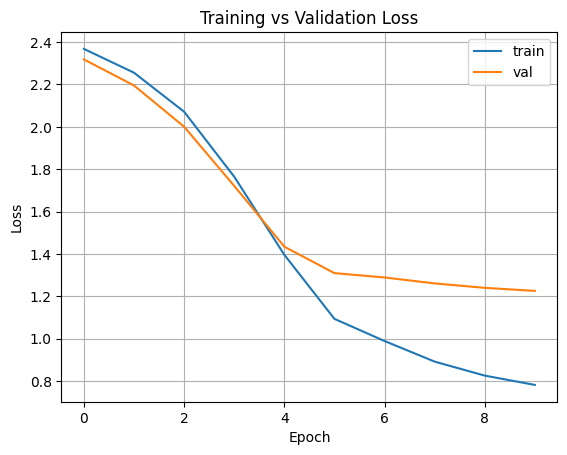

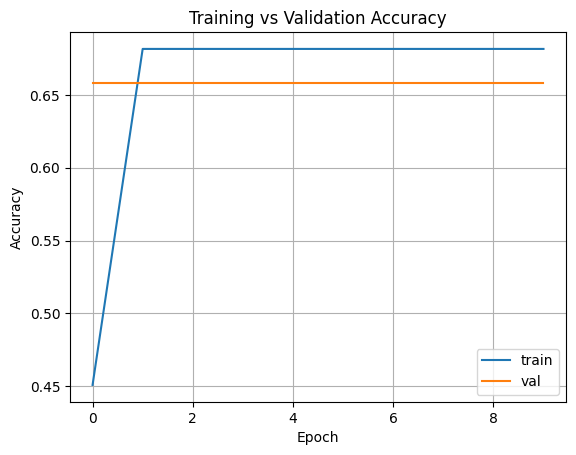

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

The training loss decreases steadily, indicating that the neural network successfully learns patterns from TF-IDF features. However, the validation loss remains higher and decreases more slowly, suggesting a generalization gap. This behavior is consistent with class imbalance and the difficulty of separating multiple sentiment categories from short text samples.